In [1]:
!pip install scikit-learn xgboost joblib plotly prophet matplotlib seaborn statsmodels

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 2.5 MB/s eta 0:00:29
    --------------------------------------- 1.0/72.0 MB 2.3 MB/s eta 0:00:32
   - -------------------------------------- 1.8/72.0 MB 3.2 MB/s eta 0:00:22
   - -------------------------------------- 2.1/72.0 MB 2.4 MB/s eta 0:00:30
   - -------------------------------------- 2.1/72.0 MB 2.4 MB/s eta 0:00:30
   - -------------------------------------- 2.4/72.0 MB 1.9 MB/s eta 0:00:36
   - -------------------------------------- 2.6/72.0 MB 1.8 MB/s eta 0:00:38
   - -------------------------------------- 3.1/72.0 MB 1.8 MB/s eta 0:00:38
   - -------------------------------------- 3.4/72.0 MB 1.8 MB/s eta 0:00:38
   -- ------------------------------------- 3.9/72.0 MB 1.9 MB/s eta 0:00:36
   -- ------------------------------------- 4.5/72.0 MB 1.9 MB/s eta 0:00:35
   -- ------------------------------------- 5.2/72.0 MB 2.1 MB/s eta 0:00:32
   ---

In [2]:
!pip install requests pandas

In [3]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time

API_KEY = "YOUR_OWN_API_KEY"   # <-- put your WeatherAPI key here
BASE_URL = "http://api.weatherapi.com/v1"

# Function to fetch historical weather for 1 day
def get_history(city, date):
    url = f"{BASE_URL}/history.json"
    params = {
        "key": API_KEY,
        "q": city,
        "dt": date
    }
    response = requests.get(url, params=params)
    return response.json()

# Convert history JSON → DataFrame (hourly data)
def history_to_df(history_json, city):
    rows = []
    for day in history_json["forecast"]["forecastday"]:
        for hour in day["hour"]:
            hour["city"] = city  # Add city column
            rows.append(hour)
    return pd.DataFrame(rows)


# -------------------------
#  MULTIPLE CITY INPUT BOX
# -------------------------

city_input = input("Enter city names (comma separated): ")
city_list = [c.strip() for c in city_input.split(",")]

days = int(input("How many past days do you want? (e.g., 30): "))


# -------------------------
# FETCH DATA FOR ALL CITIES
# -------------------------

all_data = []

for city in city_list:
    print(f"\nFetching data for: {city}")
    for i in range(days):
        date = (datetime.today() - timedelta(days=i+1)).strftime("%Y-%m-%d")
        print(f"  - {date}")
        
        try:
            json_data = get_history(city, date)
            df = history_to_df(json_data, city)
            all_data.append(df)
        except Exception as e:
            print("Error:", e)
        
        time.sleep(1)  # avoid hitting API limits


# -------------------------
# MERGE INTO ONE BIG DATASET
# -------------------------

big_df = pd.concat(all_data, ignore_index=True)
print("\nFinal Big Dataset Shape:", big_df.shape)
big_df.head()


Enter city names (comma separated):  Bangalore, Hyderabad, Kolkata, Lucknow, Patna, Chennai, Mumbai
How many past days do you want? (e.g., 30):  7



Fetching data for: Bangalore
  - 2025-12-04
  - 2025-12-03
  - 2025-12-02
  - 2025-12-01
  - 2025-11-30
  - 2025-11-29
  - 2025-11-28

Fetching data for: Hyderabad
  - 2025-12-04
  - 2025-12-03
  - 2025-12-02
  - 2025-12-01
  - 2025-11-30
  - 2025-11-29
  - 2025-11-28

Fetching data for: Kolkata
  - 2025-12-04
  - 2025-12-03
  - 2025-12-02
  - 2025-12-01
  - 2025-11-30
  - 2025-11-29
  - 2025-11-28

Fetching data for: Lucknow
  - 2025-12-04
  - 2025-12-03
  - 2025-12-02
  - 2025-12-01
  - 2025-11-30
  - 2025-11-29
  - 2025-11-28

Fetching data for: Patna
  - 2025-12-04
  - 2025-12-03
  - 2025-12-02
  - 2025-12-01
  - 2025-11-30
  - 2025-11-29
  - 2025-11-28

Fetching data for: Chennai
  - 2025-12-04
  - 2025-12-03
  - 2025-12-02
  - 2025-12-01
  - 2025-11-30
  - 2025-11-29
  - 2025-11-28

Fetching data for: Mumbai
  - 2025-12-04
  - 2025-12-03
  - 2025-12-02
  - 2025-12-01
  - 2025-11-30
  - 2025-11-29
  - 2025-11-28

Final Big Dataset Shape: (1176, 35)


,time_epoch,time,temp_c,temp_f,is_day,condition,wind_mph,wind_kph,wind_degree,wind_dir,...,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,uv,city
0,1764786600,2025-12-04 00:00,20.0,68.0,0,"{'text': 'Light rain shower', 'icon': '//cdn.w...",9.6,15.5,101,ESE,...,1,100,0,0,10.0,6.0,13.2,21.2,0.0,Bangalore
1,1764790200,2025-12-04 01:00,19.9,67.8,0,"{'text': 'Patchy rain possible', 'icon': '//cd...",9.6,15.5,97,E,...,1,100,0,0,10.0,6.0,13.4,21.6,0.0,Bangalore
2,1764793800,2025-12-04 02:00,19.4,66.9,0,"{'text': 'Light rain shower', 'icon': '//cdn.w...",10.1,16.2,97,E,...,1,100,0,0,10.0,6.0,12.5,20.2,0.0,Bangalore
3,1764797400,2025-12-04 03:00,19.6,67.3,0,"{'text': 'Patchy rain possible', 'icon': '//cd...",10.3,16.6,103,ESE,...,0,0,0,0,10.0,6.0,14.3,23.0,0.0,Bangalore
4,1764801000,2025-12-04 04:00,19.6,67.3,0,"{'text': 'Patchy rain possible', 'icon': '//cd...",10.1,16.2,109,ESE,...,0,0,0,0,10.0,6.0,13.6,22.0,0.0,Bangalore


In [4]:
big_df.shape

(1176, 35)

# Basic EDA - Exploatory Data Analysism

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
# Shape of the Data and information from the columns
print("Shape of dataset:", big_df.shape)
big_df.info()

Shape of dataset: (1176, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time_epoch      1176 non-null   int64  
 1   time            1176 non-null   object 
 2   temp_c          1176 non-null   float64
 3   temp_f          1176 non-null   float64
 4   is_day          1176 non-null   int64  
 5   condition       1176 non-null   object 
 6   wind_mph        1176 non-null   float64
 7   wind_kph        1176 non-null   float64
 8   wind_degree     1176 non-null   int64  
 9   wind_dir        1176 non-null   object 
 10  pressure_mb     1176 non-null   float64
 11  pressure_in     1176 non-null   float64
 12  precip_mm       1176 non-null   float64
 13  precip_in       1176 non-null   float64
 14  snow_cm         1176 non-null   float64
 15  humidity        1176 non-null   int64  
 16  cloud           1176 non-null   int64  
 17  feel

In [7]:
# Checking the duplicates
big_df.isnull().sum()

time_epoch        0
time              0
temp_c            0
temp_f            0
is_day            0
condition         0
wind_mph          0
wind_kph          0
wind_degree       0
wind_dir          0
pressure_mb       0
pressure_in       0
precip_mm         0
precip_in         0
snow_cm           0
humidity          0
cloud             0
feelslike_c       0
feelslike_f       0
windchill_c       0
windchill_f       0
heatindex_c       0
heatindex_f       0
dewpoint_c        0
dewpoint_f        0
will_it_rain      0
chance_of_rain    0
will_it_snow      0
chance_of_snow    0
vis_km            0
vis_miles         0
gust_mph          0
gust_kph          0
uv                0
city              0
dtype: int64

In [8]:
#Convert columns → correct datatypes

big_df['time'] = pd.to_datetime(big_df['time'])
big_df['temp_c'] = pd.to_numeric(big_df['temp_c'])
big_df['humidity'] = pd.to_numeric(big_df['humidity'])
big_df['wind_kph'] = pd.to_numeric(big_df['wind_kph'])
big_df['pressure_mb'] = pd.to_numeric(big_df['pressure_mb'])
big_df['precip_mm'] = pd.to_numeric(big_df['precip_mm'])

In [9]:
# Add useful time features
big_df["year"] = big_df["time"].dt.year
big_df["month"] = big_df["time"].dt.month
big_df["day"] = big_df["time"].dt.day
big_df["hour"] = big_df["time"].dt.hour
big_df["day_of_week"] = big_df["time"].dt.dayofweek

In [10]:
# City-wise basic statistics
big_df.groupby("city")[["temp_c","humidity","wind_kph","precip_mm"]].describe()

temp_c                                                          \
           count       mean       std   min     25%    50%     75%   max   
city                                                                       
Bangalore  168.0  19.967857  2.481460  14.7  18.000  19.90  21.600  26.1   
Chennai    168.0  25.548810  1.275658  23.1  24.575  25.70  26.400  28.1   
Hyderabad  168.0  21.208333  3.341275  15.3  18.675  20.50  24.025  28.2   
Kolkata    168.0  23.080952  3.518232  16.4  20.100  22.70  26.425  29.1   
Lucknow    168.0  19.728571  3.717706  13.8  16.575  19.10  22.850  26.8   
Mumbai     168.0  26.266667  1.753343  23.1  24.900  26.15  27.625  30.0   
Patna      168.0  20.152976  3.703954  13.5  17.200  19.40  23.300  26.8   

          humidity             ... wind_kph       precip_mm            \
             count       mean  ...      75%   max     count      mean   
city                           ...                                      
Bangalore    168.0  83.494048  ...   16.900  22.3     168.0  0.316071   
Chennai      168.0  81.464286  ...   32.875  38.9     168.0  0.745833   
Hyderabad    168.0  55.309524  ...   12.200  17.3     168.0  0.000595   
Kolkata      168.0  40.952381  ...   10.100  15.5     168.0  0.000000   
Lucknow      168.0  30.148810  ...   10.100  14.8     168.0  0.000000   
Mumbai       168.0  48.190476  ...   14.000  19.8     168.0  0.000000   
Patna        168.0  38.845238  ...   10.175  13.7     168.0  0.000000   

                                              
                std  min  25%  50%  75%  max  
city                                          
Bangalore  0.844378  0.0  0.0  0.0  0.1  4.2  
Chennai    0.659328  0.0  0.1  0.7  1.1  2.8  
Hyderabad  0.007715  0.0  0.0  0.0  0.0  0.1  
Kolkata    0.000000  0.0  0.0  0.0  0.0  0.0  
Lucknow    0.000000  0.0  0.0  0.0  0.0  0.0  
Mumbai     0.000000  0.0  0.0  0.0  0.0  0.0  
Patna      0.000000  0.0  0.0  0.0  0.0  0.0  

[7 rows x 32 columns]

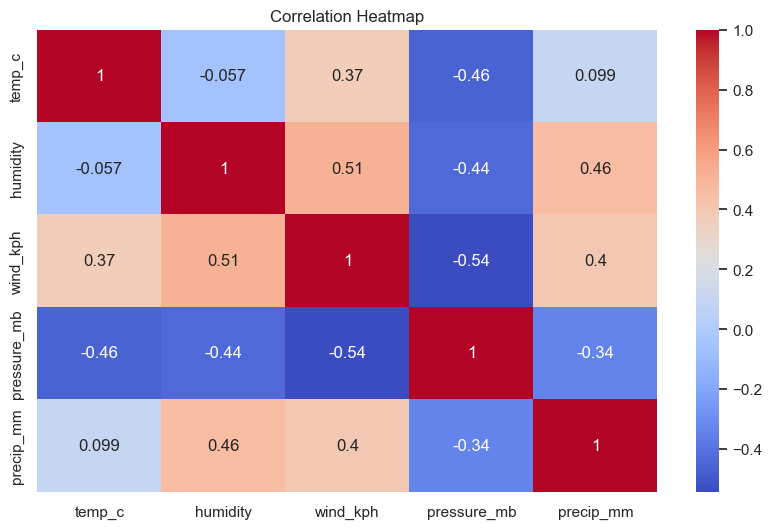

In [11]:
# Correlation Heatmap (Numerical Features)
plt.figure(figsize=(10,6))
sns.heatmap(big_df[["temp_c","humidity","wind_kph","pressure_mb","precip_mm"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

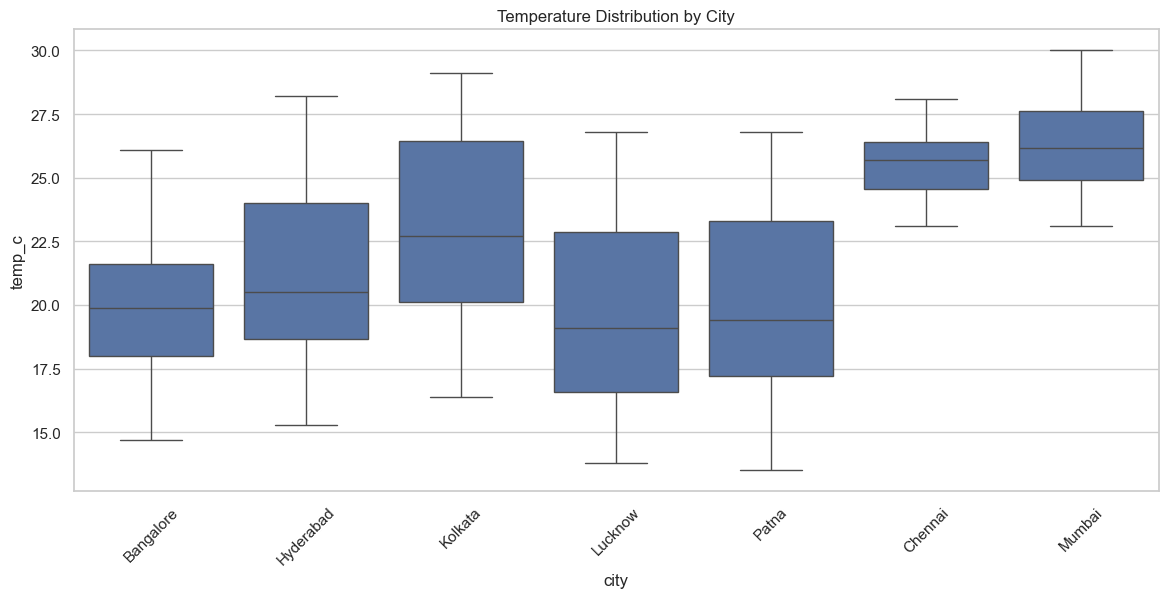

In [12]:
# City-wise Temperature Distribution

plt.figure(figsize=(14,6))
sns.boxplot(x="city", y="temp_c", data=big_df)
plt.xticks(rotation=45)
plt.title("Temperature Distribution by City")
plt.show()

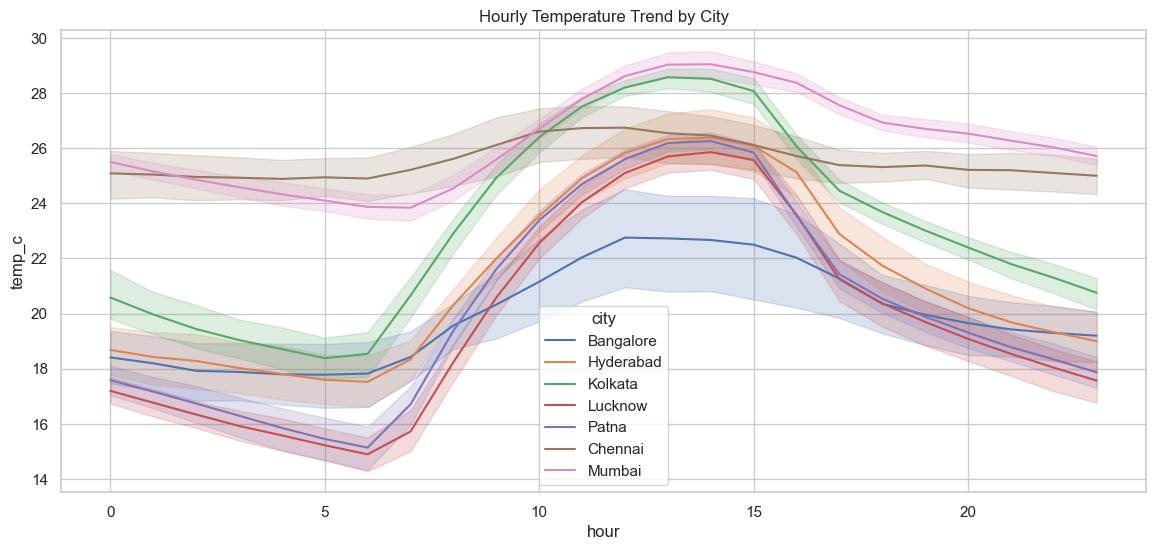

In [13]:
# Hourly Temperature Trend for Each City

plt.figure(figsize=(14,6))
sns.lineplot(data=big_df, x="hour", y="temp_c", hue="city")
plt.title("Hourly Temperature Trend by City")
plt.show()

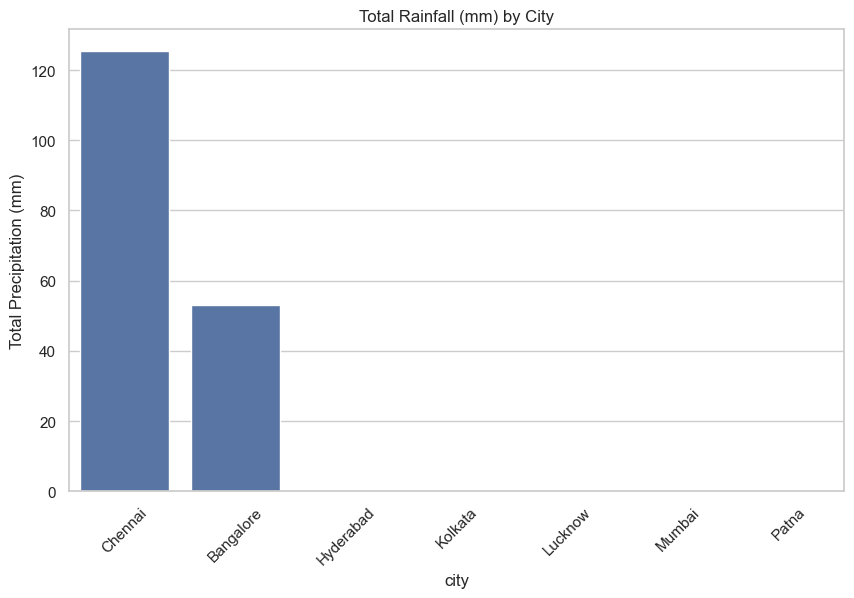

In [14]:
# Rainfall Analysis (Which city rains more?)

rain_df = big_df.groupby("city")["precip_mm"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=rain_df.index, y=rain_df.values)
plt.title("Total Rainfall (mm) by City")
plt.xticks(rotation=45)
plt.ylabel("Total Precipitation (mm)")
plt.show()

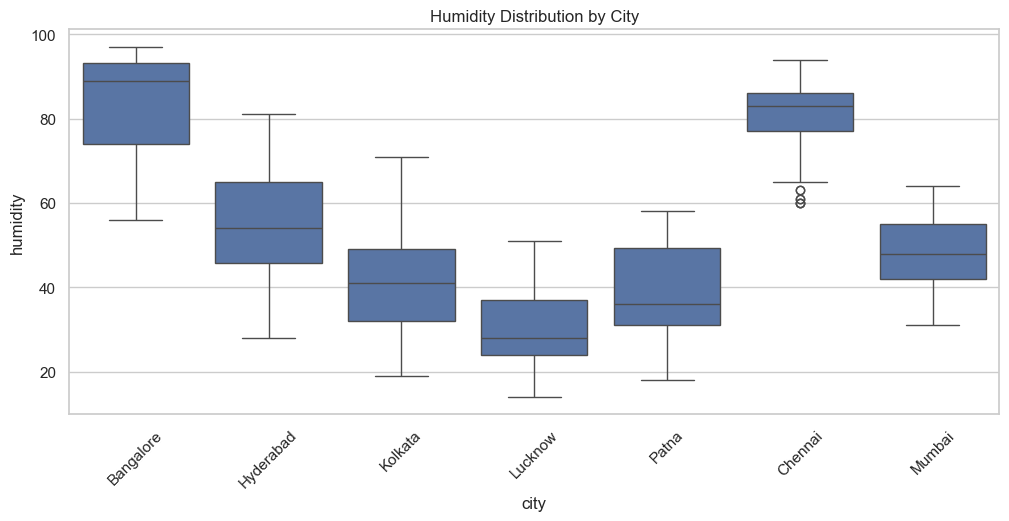

In [15]:
# Humidity Comparison (City-wise)

plt.figure(figsize=(12,5))
sns.boxplot(data=big_df, x="city", y="humidity")
plt.xticks(rotation=45)
plt.title("Humidity Distribution by City")
plt.show()

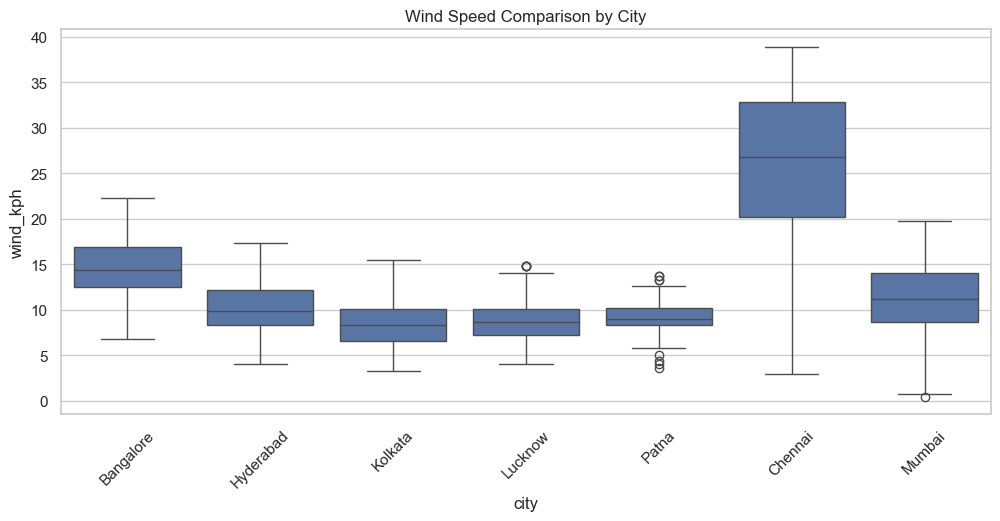

In [16]:
# Wind Speed Comparison

plt.figure(figsize=(12,5))
sns.boxplot(data=big_df, x="city", y="wind_kph")
plt.xticks(rotation=45)
plt.title("Wind Speed Comparison by City")
plt.show()

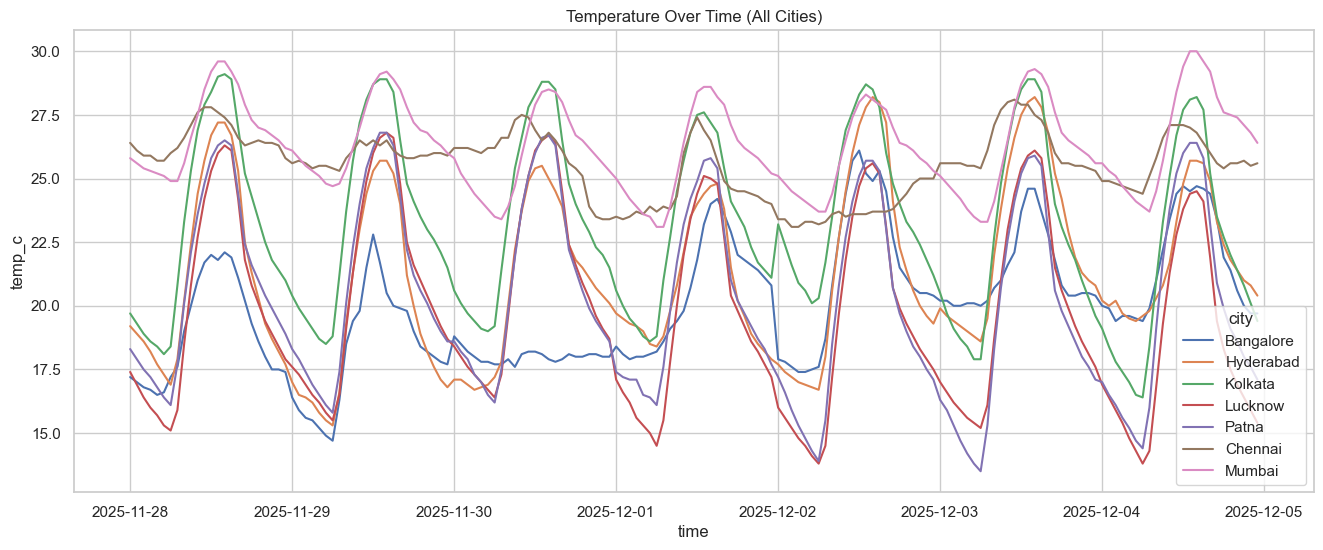

In [17]:
# Temperature Over Time for Each City

plt.figure(figsize=(16,6))
sns.lineplot(x="time", y="temp_c", hue="city", data=big_df)
plt.title("Temperature Over Time (All Cities)")
plt.show()

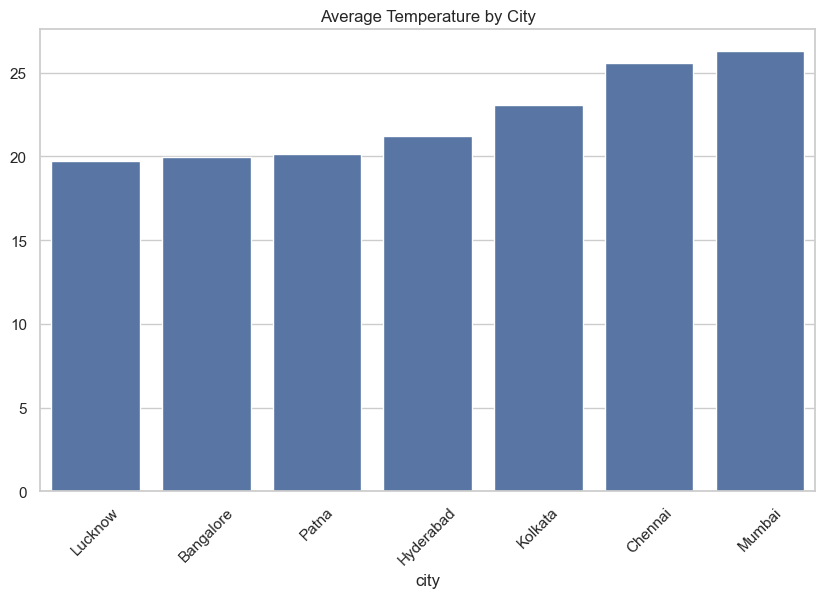

In [18]:
# City-wise Average Temperature Ranking

avg_temp = big_df.groupby("city")["temp_c"].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=avg_temp.index, y=avg_temp.values)
plt.xticks(rotation=45)
plt.title("Average Temperature by City")
plt.show()

# 1. Feature Engineering

## 1.1.create features for ML

In [19]:
df = big_df.copy()  # keep original intact
# Ensure types
df['time'] = pd.to_datetime(df['time'])
for col in ['temp_c','humidity','wind_kph','precip_mm','pressure_mb']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Basic time features
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['dayofweek'] = df['time'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)

# Rolling and lag features (per city)
df = df.sort_values(['city','time']).reset_index(drop=True)
window_hours = [1,3,6,24]  # adjust as needed

for w in window_hours:
    df[f'temp_roll_mean_{w}'] = df.groupby('city')['temp_c'].transform(lambda x: x.rolling(window=w, min_periods=1).mean())
    df[f'temp_lag_{w}'] = df.groupby('city')['temp_c'].shift(w)

# Precipitation lag and binary rain target for classification
df['precip_mm'] = df['precip_mm'].fillna(0)
df['precip_lag_1'] = df.groupby('city')['precip_mm'].shift(1).fillna(0)
# Binary target: will it rain next hour? (1 if next hour precip > 0)
df['rain_next_hour'] = (df.groupby('city')['precip_mm'].shift(-1) > 0).astype(int)

# Temperature target for regression: next hour temp
df['temp_next_hour'] = df.groupby('city')['temp_c'].shift(-1)

# Drop rows with NA in target columns
df = df.dropna(subset=['temp_next_hour']).reset_index(drop=True)

print("Feature engineering done. Shape:", df.shape)
df.head()

Feature engineering done. Shape: (1169, 53)


,time_epoch,time,temp_c,temp_f,is_day,condition,wind_mph,wind_kph,wind_degree,wind_dir,...,temp_lag_1,temp_roll_mean_3,temp_lag_3,temp_roll_mean_6,temp_lag_6,temp_roll_mean_24,temp_lag_24,precip_lag_1,rain_next_hour,temp_next_hour
0,1764268200,2025-11-28 00:00:00,17.2,63.0,0,"{'text': 'Partly cloudy', 'icon': '//cdn.weath...",8.3,13.3,39,NE,...,NaN,17.200000,NaN,17.200,NaN,17.200,NaN,0.0,0,17.0
1,1764271800,2025-11-28 01:00:00,17.0,62.6,0,"{'text': 'Partly cloudy', 'icon': '//cdn.weath...",8.1,13.0,52,NE,...,17.2,17.100000,NaN,17.100,NaN,17.100,NaN,0.0,0,16.8
2,1764275400,2025-11-28 02:00:00,16.8,62.2,0,"{'text': 'Partly cloudy', 'icon': '//cdn.weath...",7.6,12.2,58,ENE,...,17.0,17.000000,NaN,17.000,NaN,17.000,NaN,0.0,0,16.7
3,1764279000,2025-11-28 03:00:00,16.7,62.1,0,"{'text': 'Partly cloudy', 'icon': '//cdn.weath...",8.7,14.0,42,NE,...,16.8,16.833333,17.2,16.925,NaN,16.925,NaN,0.0,0,16.5
4,1764282600,2025-11-28 04:00:00,16.5,61.7,0,"{'text': 'Partly cloudy', 'icon': '//cdn.weath...",9.2,14.8,61,ENE,...,16.7,16.666667,17.0,16.840,NaN,16.840,NaN,0.0,0,16.6


# 2. Train/Test Splitting (time-aware)

In [20]:
from sklearn.model_selection import TimeSeriesSplit

# Choose features for both tasks
features = [
    'hour','dayofweek','is_weekend','temp_c','humidity','wind_kph',
    'temp_roll_mean_1','temp_roll_mean_3','temp_roll_mean_6','temp_roll_mean_24',
    'temp_lag_1','temp_lag_3','temp_lag_6','temp_lag_24',
    'precip_lag_1'
]
# ensure features exist
features = [f for f in features if f in df.columns]
print("Using features:", features)

# Sort by time
df = df.sort_values('time').reset_index(drop=True)

# Simple holdout split: last 20% time as test
split_index = int(len(df) * 0.8)
train_df = df.iloc[:split_index].copy()
test_df  = df.iloc[split_index:].copy()

print("Train shape:", train_df.shape, "Test shape:", test_df.shape)

Using features: ['hour', 'dayofweek', 'is_weekend', 'temp_c', 'humidity', 'wind_kph', 'temp_roll_mean_1', 'temp_roll_mean_3', 'temp_roll_mean_6', 'temp_roll_mean_24', 'temp_lag_1', 'temp_lag_3', 'temp_lag_6', 'temp_lag_24', 'precip_lag_1']
Train shape: (935, 53) Test shape: (234, 53)


# 3. Rain Prediction (Classification) — RandomForest + XGBoost

In [21]:
!pip install joblib

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import joblib
import os

# Prepare X/y
X_train = train_df[features].fillna(-999)
y_train = train_df['rain_next_hour']

X_test  = test_df[features].fillna(-999)
y_test  = test_df['rain_next_hour']

In [23]:
# Train RandomForest
rfc = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [24]:
# Predict & evaluate
y_pred = rfc.predict(X_test)
y_proba = rfc.predict_proba(X_test)[:,1]

In [26]:
print("Classification Report (RandomForest):")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Create directory if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the model
joblib.dump(rfc, "models/rain_rf_model.joblib")

print("Model saved successfully!")

Classification Report (RandomForest):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       191
           1       0.86      0.86      0.86        43

    accuracy                           0.95       234
   macro avg       0.91      0.91      0.91       234
weighted avg       0.95      0.95      0.95       234

ROC AUC: 0.978692317058322
Model saved successfully!


In [27]:
city_models = {}
for city in df['city'].unique():
    sub = df[df['city']==city].sort_values('time').reset_index(drop=True)
    if len(sub) < 500:  # skip tiny datasets
        continue
    si = int(len(sub)*0.8)
    Xtr, Xte = sub.iloc[:si][features].fillna(-999), sub.iloc[si:][features].fillna(-999)
    ytr, yte = sub.iloc[:si]['rain_next_hour'], sub.iloc[si:]['rain_next_hour']
    m = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
    m.fit(Xtr, ytr)
    city_models[city] = m
    print(city, "trained; test size:", len(yte))


# 4. Temperature Forecasting (Regression) — RandomForest / XGBoost

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Regression target
X_train_r = train_df[features].fillna(-999)
y_train_r = train_df['temp_next_hour']
X_test_r  = test_df[features].fillna(-999)
y_test_r  = test_df['temp_next_hour']

In [29]:
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_reg.fit(X_train_r, y_train_r)
pred_r = rf_reg.predict(X_test_r)

print("MAE:", mean_absolute_error(y_test_r, pred_r))
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, pred_r)))

joblib.dump(rf_reg, "models/temp_rf_model.joblib")

MAE: 0.317108974358974
RMSE: 0.4544784262836517


['models/temp_rf_model.joblib']

# 5. Time-Series Model (Prophet) — per city daily or hourly

00:27:23 - cmdstanpy - INFO - Chain [1] start processing
00:27:24 - cmdstanpy - INFO - Chain [1] done processing


Bangalore Prophet MAE: 2.4587280347100595


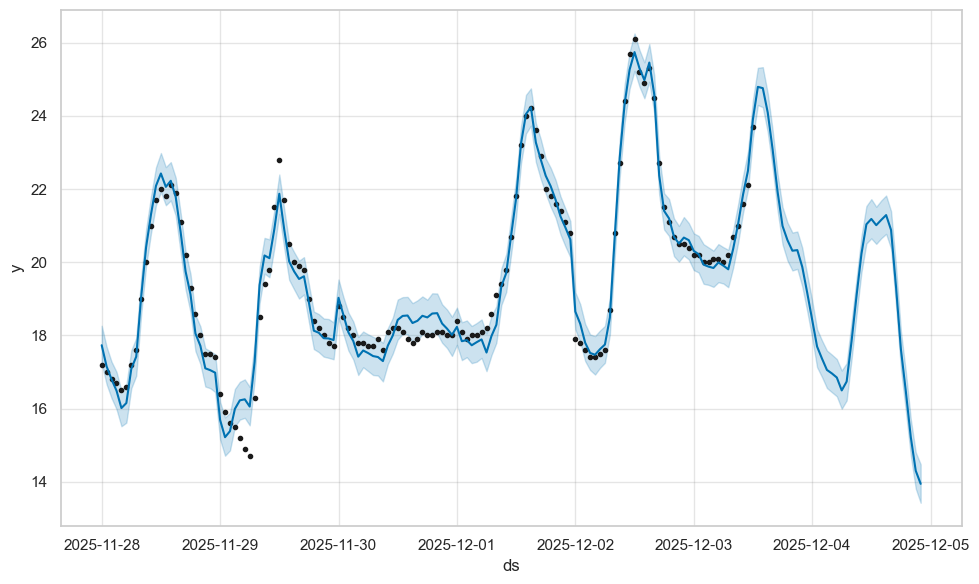

In [31]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

city = 'Bangalore'
city_df = df[df['city'] == city].sort_values('time').reset_index(drop=True)

# Include humidity in prophet dataframe
prophet_df = city_df[['time', 'temp_c', 'humidity']].rename(
    columns={'time': 'ds', 'temp_c': 'y'}
)

# Initialize model
m = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True,
    weekly_seasonality=True
)

# Add regressor
m.add_regressor('humidity')

# Split 80%
split = int(len(prophet_df) * 0.8)

# Fit model WITH regressor
m.fit(prophet_df.iloc[:split])

# Build future dataframe
future = m.make_future_dataframe(periods=len(prophet_df) - split, freq='H')

# Add humidity values to future (Prophet requires it)
future['humidity'] = prophet_df['humidity']

# Predict
forecast = m.predict(future)

# Evaluate
pred = forecast.iloc[split:]['yhat'].values
true = prophet_df.iloc[split:]['y'].values

print(city, "Prophet MAE:", mean_absolute_error(true, pred))

# Plot forecast
fig = m.plot(forecast)

# 6. Model Diagnostics & Feature Importance

In [32]:
# Feature importances for the RF regression model

fi = pd.DataFrame({'feature': features, 'importance': rf_reg.feature_importances_}).sort_values('importance', ascending=False)
fi.head(20)


,feature,importance
6,temp_roll_mean_1,0.491230
3,temp_c,0.458038
0,hour,0.014422
8,temp_roll_mean_6,0.008104
11,temp_lag_3,0.005730
9,temp_roll_mean_24,0.004544
7,temp_roll_mean_3,0.004531
10,temp_lag_1,0.003522
12,temp_lag_6,0.002797
4,humidity,0.002651


# 6. Simple Plotly Dashboard (interactive)

Enter city to visualize (e.g., Delhi):  Bangalore


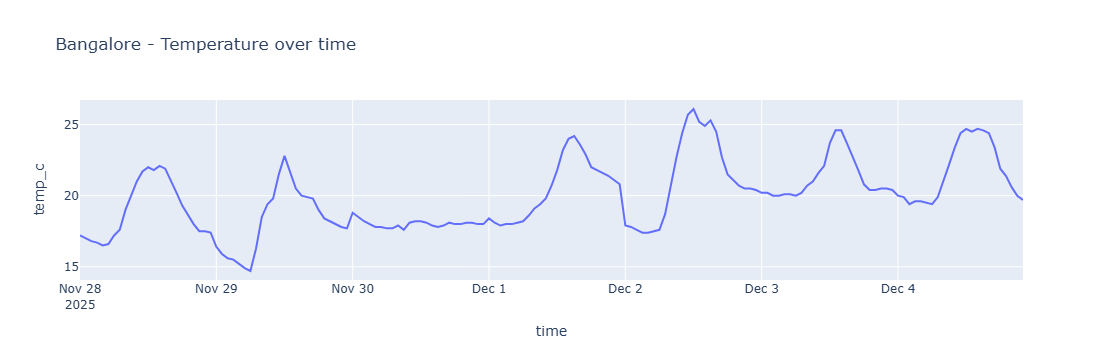

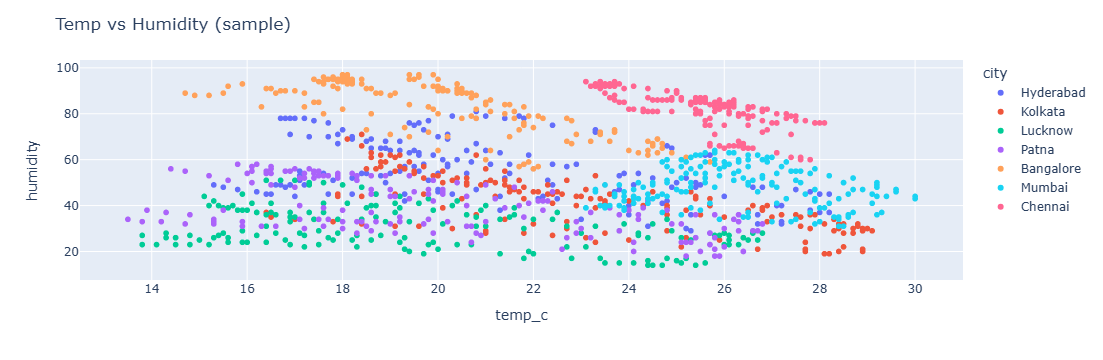

In [34]:
import plotly.express as px
import plotly.graph_objects as go

# 1) Interactive time series for chosen city
city_choice = input("Enter city to visualize (e.g., Delhi): ").strip()
vis_df = df[df['city']==city_choice].sort_values('time')

fig = px.line(vis_df, x='time', y='temp_c', title=f"{city_choice} - Temperature over time")
fig.show()

# 2) Interactive scatter: temperature vs humidity colored by city
fig2 = px.scatter(df.sample(min(2000,len(df))), x='temp_c', y='humidity', color='city', hover_data=['time'])
fig2.update_layout(title="Temp vs Humidity (sample)")
fig2.show()

# 3) Map-style: if you have lat/lon columns
if 'lat' in df.columns and 'lon' in df.columns:
    latest = df.sort_values('time').groupby('city').tail(1)
    fig3 = px.scatter_mapbox(latest, lat='lat', lon='lon', hover_name='city', size='temp_c', zoom=3)
    fig3.update_layout(mapbox_style="open-street-map")
    fig3.show()

# 8. Save Models and Pipelines

In [35]:
import joblib
joblib.dump(rf_reg, "models/temp_rf_model.joblib")
joblib.dump(rfc, "models/rain_rf_model.joblib")
# Example: save label encoders / scalers if used

['models/rain_rf_model.joblib']